In [13]:
import numpy as np

# Read the new files
AFS_growth_test_filled = np.loadtxt('AFS_test_filled.txt')
AFS_growth_train_filled = np.loadtxt('AFS_train_filled.txt')
theta_test = np.loadtxt('theta_test.txt')
theta_train = np.loadtxt('theta_train.txt')

# Display the data
print("AFS Growth Test Filled Data:")
print(AFS_growth_test_filled)
print("\nAFS Growth Train Filled Data:")
print(AFS_growth_train_filled)
print("\nGrowth Test Data (Theta):")
print(theta_test)
print("\nGrowth Train Data (Theta):")
print(theta_train)

AFS Growth Test Filled Data:
[[ 9.  1.  2. ...  0.  0.  0.]
 [12.  3.  0. ...  0.  0.  0.]
 [ 8.  6.  1. ...  0.  0.  0.]
 ...
 [ 2.  3.  1. ...  0.  0.  0.]
 [ 7.  1.  0. ...  0.  0.  0.]
 [39.  5.  5. ...  0.  0.  0.]]

AFS Growth Train Filled Data:
[[15.  2.  2. ...  0.  0.  0.]
 [10.  3.  1. ...  0.  0.  0.]
 [12.  4.  6. ...  0.  0.  0.]
 ...
 [ 7.  5.  4. ...  0.  0.  0.]
 [ 7.  5.  2. ...  0.  0.  0.]
 [ 9.  3.  3. ...  0.  0.  0.]]

Growth Test Data (Theta):
[19.305002 20.327783 25.935548  8.07144  31.667031 23.162875 10.768527
 39.607714 36.614535 40.607725 16.118907 29.183343  4.656394 39.478599
 23.330393 49.517545 39.868063 18.950541 23.858286 35.235718 47.717597
  8.032549 43.454268 43.010344 33.165182  4.071387 11.117481 10.697351
 21.335005 42.901064 27.311978  8.730248 36.041253 24.07691  40.089229
  9.651104 14.688285 49.975982 18.332141 40.113578 48.148124 10.40257
 33.614209 26.251992 10.299215  8.331093 25.890452 31.597501 24.625862
  6.676867  9.54883  14.062746 48

In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
AFS_growth_train = np.loadtxt('AFS_train_filled.txt')
theta_train = np.loadtxt('theta_train.txt')
AFS_growth_test = np.loadtxt('AFS_test_filled.txt')
theta_test = np.loadtxt('theta_test.txt')

# Create and train the linear model
linear_model = LinearRegression()
linear_model.fit(AFS_growth_train, theta_train)

# Predict the theta values for the test set
theta_test_pred = linear_model.predict(AFS_growth_test)

# Calculate the normalized Mean Squared Error (MSE) on the test set
mse_weighted = np.mean(((theta_test - theta_test_pred)**2) / (theta_test**2))

# Calculate the Mean Squared Error (MSE) on the test set without weighting
mse = mean_squared_error(theta_test, theta_test_pred)

# Print the MSE
print(f"Mean Squared Error on theta_test: {mse}")
# Print the weighted MSE
print(f"Weighted Mean Squared Error on theta_test: {mse_weighted}")

Mean Squared Error on theta_test: 55.75731554672452
Weighted Mean Squared Error on theta_test: 15.257101559500454


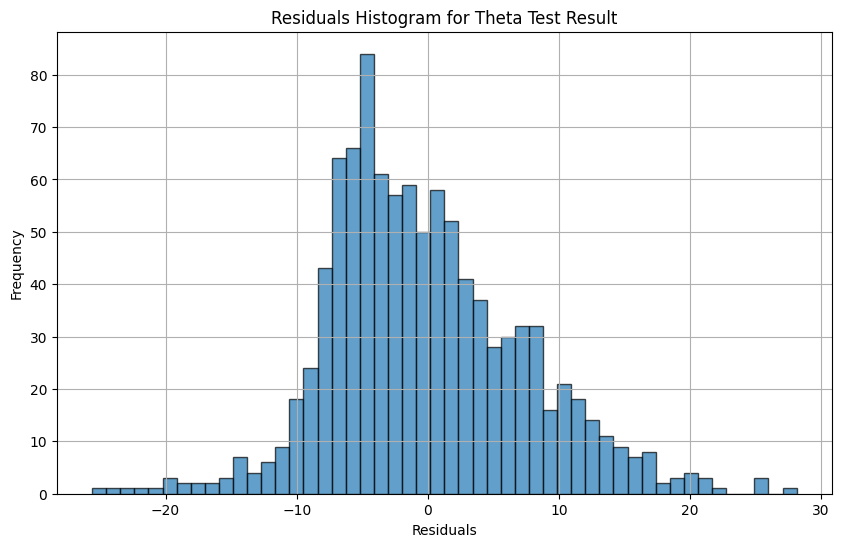

In [17]:
# Calculate the residuals for the growth result
import matplotlib.pyplot as plt
residuals_theta_test = theta_test - theta_test_pred

# Plot the histogram of residuals for the growth result
plt.figure(figsize=(10, 6))
plt.hist(residuals_theta_test, bins=50, edgecolor='k', alpha=0.7)
plt.title('Residuals Histogram for Theta Test Result')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


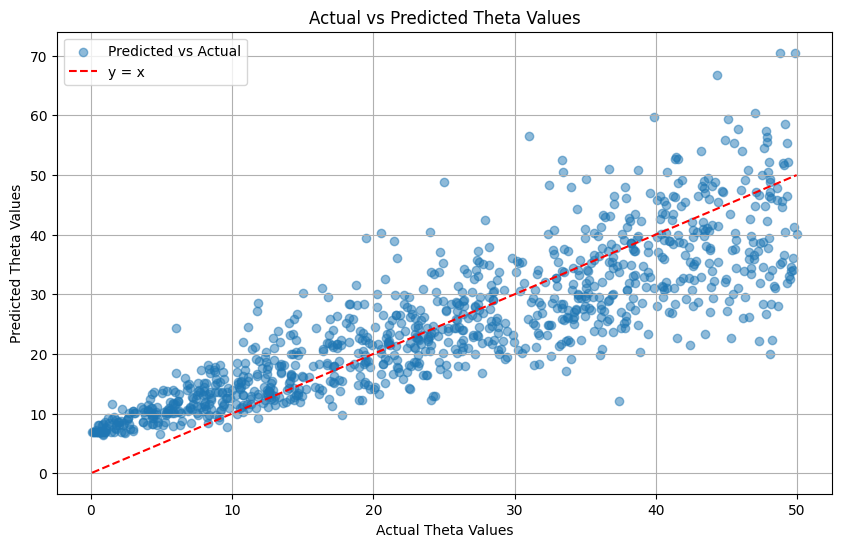

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(theta_test, theta_test_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(theta_test), max(theta_test)], [min(theta_test), max(theta_test)], color='red', linestyle='--', label='y = x')
plt.title('Actual vs Predicted Theta Values')
plt.xlabel('Actual Theta Values')
plt.ylabel('Predicted Theta Values')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Conv1D, Flatten


# Load the data
AFS_growth_train_filled = np.loadtxt('AFS_train_filled.txt')
growth_train = np.loadtxt('theta_train.txt')
AFS_growth_test_filled = np.loadtxt('AFS_test_filled.txt')
growth_test = np.loadtxt('theta_test.txt')
# No log transformation applied

# Normalize the data
scaler = StandardScaler()
AFS_growth_train_filled = scaler.fit_transform(AFS_growth_train_filled)
AFS_growth_test_filled = scaler.transform(AFS_growth_test_filled)

# Use the entire training data for training
X_train, y_train = AFS_growth_train_filled, growth_train

# Build the CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', padding='same', input_shape=(AFS_growth_train_filled.shape[1], 1)),
    Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    Conv1D(32, kernel_size=3, activation='relu', padding='same'),
    Conv1D(16, kernel_size=3, activation='relu', padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

# Reshape the data to fit the model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
AFS_growth_test_filled = AFS_growth_test_filled.reshape(AFS_growth_test_filled.shape[0], AFS_growth_test_filled.shape[1], 1)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(AFS_growth_test_filled, growth_test)
print(f"Test MAE: {test_mae}")

# Predict the growth_test values (theta)
growth_test_pred_cnn = model.predict(AFS_growth_test_filled)

# Print the predicted growth_test values (theta)
print("Predicted Growth Test Values (Theta):", growth_test_pred_cnn.flatten())


Epoch 1/50


C:\Users\xuech\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 181.1791 - mae: 9.9214
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 46.5239 - mae: 5.2922
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 45.3355 - mae: 5.2078
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 44.2342 - mae: 5.1404
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 43.3418 - mae: 5.0978
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 44.4403 - mae: 5.1632
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 44.1931 - mae: 5.1395
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 44.0098 - mae: 5.1005
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 43.1128 - mae: 5.0632
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 42.1687 - mae: 5.0059
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 43.0791 - mae: 5.0694
Epoch 12/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 41.5945 - mae: 4.9744
Epoch 13/50
625/625 ━━━

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error
mse_cnn = mean_squared_error(growth_test, growth_test_pred_cnn)

# Calculate the Mean Absolute Error
mae_cnn = np.mean(np.abs(growth_test - growth_test_pred_cnn))

# Calculate the R² Score
r2_score_cnn = r2_score(growth_test, growth_test_pred_cnn)

# Calculate the correlation coefficient
correlation_cnn = np.corrcoef(growth_test.flatten(), growth_test_pred_cnn.flatten())[0, 1]

# Print the values
print("Mean Squared Error:", mse_cnn)
print("Mean Absolute Error:", mae_cnn)
print("R² Score:", r2_score_cnn)
print("Correlation Coefficient:", correlation_cnn)

# Calculate the normalized Mean Squared Error (MSE) on the test set
normalized_mse_cnn = np.mean(((growth_test - growth_test_pred_cnn)**2) / (growth_test**2))
#print(f"First 10 normalized MSE values: {((growth_test[:10] - growth_test_pred_cnn[:10])**2) / (growth_test[:10]**2)}")

# Print the normalized MSE
print(f"Normalized Mean Squared Error on growth_test: {normalized_mse_cnn}")

# Calculate the normalized Mean Absolute Error (MAE) on the test set
normalized_mae_cnn = np.mean(np.abs((growth_test - growth_test_pred_cnn.flatten()) / growth_test))

# Print the normalized MAE
print(f"Normalized Mean Absolute Error on growth_test: {normalized_mae_cnn}")


Mean Squared Error: 53.89789811704727
Mean Absolute Error: 16.00147325876472
R² Score: 0.737886643865563
Correlation Coefficient: 0.8620433266848799
Normalized Mean Squared Error on growth_test: 248.98106747934528
Normalized Mean Absolute Error on growth_test: 0.3630123184831986


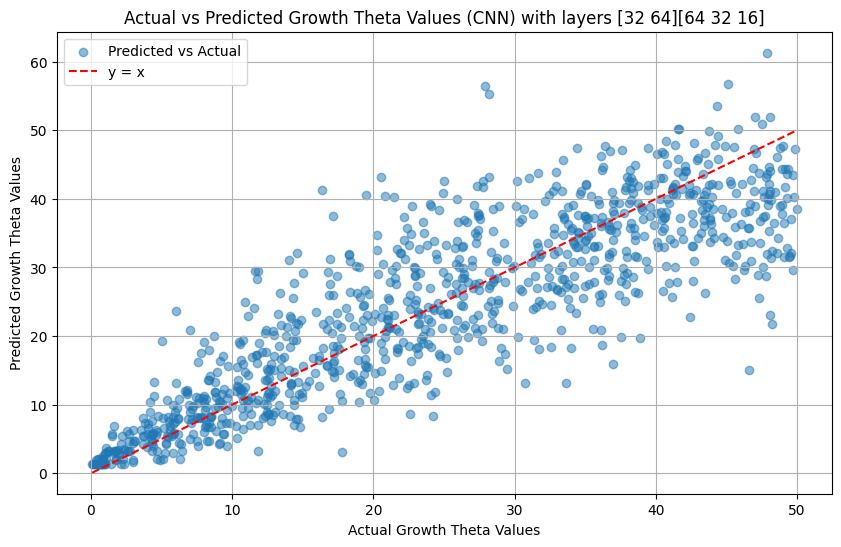

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(growth_test, growth_test_pred_cnn, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(growth_test), max(growth_test)], [min(growth_test), max(growth_test)], color='red', linestyle='--', label='y = x')
plt.title('Actual vs Predicted Growth Theta Values (CNN) with layers [32 64][64 32 16]')
plt.xlabel('Actual Growth Theta Values')
plt.ylabel('Predicted Growth Theta Values')
plt.legend()
plt.grid(True)
plt.show()

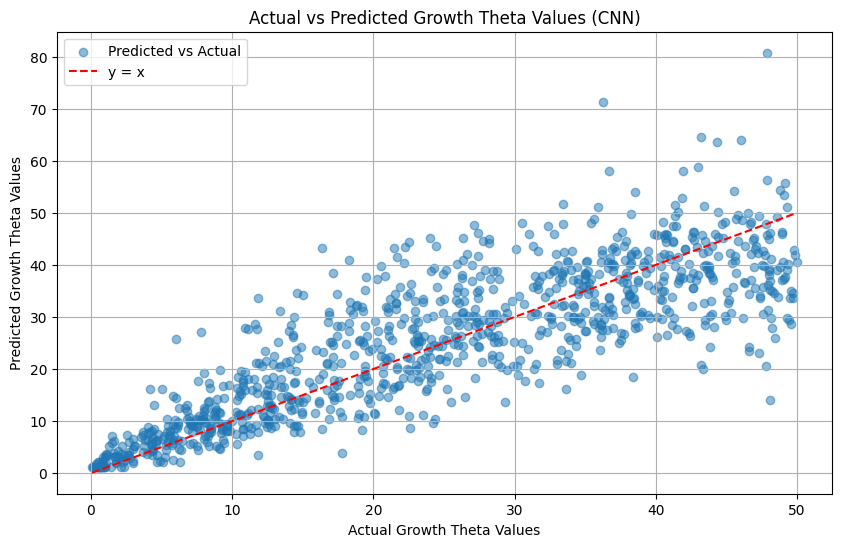

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(growth_test, growth_test_pred_cnn, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(growth_test), max(growth_test)], [min(growth_test), max(growth_test)], color='red', linestyle='--', label='y = x')
plt.title('Actual vs Predicted Growth Theta Values (CNN)')
plt.xlabel('Actual Growth Theta Values')
plt.ylabel('Predicted Growth Theta Values')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from sklearn.preprocessing import StandardScaler

# Function to parse SNP data
def parse_snp_file(file_path):
    with open(file_path, 'r') as file:
        data = file.read().split('//')
    # Count the number of data chunks
    num_chunks = len(data)
    print("Number of data chunks:", num_chunks)
    snp_matrices = []
    for block in data:
        if 'segsites' in block and 'positions' in block:
            lines = block.strip().split('\n')
            # Extract the SNP matrix
            snp_matrix = []
            for line in lines:
                if line.startswith('positions:'):
                    continue
                if line.strip().isdigit():
                    snp_matrix.append([int(x) for x in line.strip()])
            snp_matrices.append(np.array(snp_matrix))
            # snp_matrices.append(np.array(snp_matrix))
            #first_matrix = snp_matrices[0]
            # print("First two lines of the first matrix:")
            # print(first_matrix[:2])
            # print("\nLast two lines of the first matrix:")
            # print(first_matrix[-2:])
            # break
        elif 'segsites: 0' in block and 'positions' not in block:
            snp_matrix = np.zeros((1, 200))
            snp_matrices.append(snp_matrix)
    return snp_matrices

# Load the SNP data
snp_train = parse_snp_file('SNP_train.txt')
# Print the first two and last two lines of the first matrix
first_matrix = snp_train[0]
print("First two lines of the first matrix:")
print(first_matrix[:2])
print("\nLast two lines of the first matrix:")
print(first_matrix[-2:])
# Count the number of SNP matrices
num_snp_matrices = len(snp_train)
print("Number of SNP matrices:", num_snp_matrices)

# Load the theta values
theta_train = np.loadtxt('theta_train.txt')

# Pad the SNP matrices to ensure they all have the same length
max_length = max(len(matrix) for matrix in snp_train)
max_row_length = max(len(row) for matrix in snp_train for row in matrix)
snp_train_padded = [np.pad(matrix, ((0, max_length - len(matrix)), (0, max_row_length - len(matrix[0]))), mode='constant') for matrix in snp_train]
first_matrix_padded = snp_train_padded[0]
print("padded:")
print(first_matrix_padded[:2])
print("\npadded:")
print(first_matrix_padded[-2:])
# Convert the list of padded matrices to a NumPy array
snp_train = np.array(snp_train_padded)

# Normalize the SNP data
scaler = StandardScaler()
snp_train = scaler.fit_transform(snp_train.reshape(-1, snp_train.shape[-1])).reshape(snp_train.shape)

# Build the improved CNN model based on the refined hyperparameters
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', padding='same', input_shape=(snp_train.shape[1], snp_train.shape[2])),
    Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    Conv1D(32, kernel_size=3, activation='relu', padding='same'),
    Conv1D(16, kernel_size=3, activation='relu', padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with dropout
history = model.fit(snp_train, theta_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the training data
train_loss, train_mae = model.evaluate(snp_train, theta_train)
print(f"Train MAE: {train_mae}")

# Predict the theta values using the model
theta_train_pred = model.predict(snp_train)

# Print the predicted theta values
print("Predicted Theta Train Values:", theta_train_pred.flatten())

Number of data chunks: 20001
First two lines of the first matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]]

Last two lines of the first matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]]
Number of SNP matrices: 20000
padded:
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

C:\Users\xuech\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 169.2453 - mae: 9.6035 - val_loss: 64.1149 - val_mae: 6.3185
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 63.2661 - mae: 6.2355 - val_loss: 59.3081 - val_mae: 6.0598
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 56.9522 - mae: 5.9170 - val_loss: 63.8608 - val_mae: 6.2659
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 55.5872 - mae: 5.7984 - val_loss: 54.2297 - val_mae: 5.7238
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 50.6249 - mae: 5.5271 - val_loss: 55.1857 - val_mae: 5.7055
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 50.1623 - mae: 5.4752 - val_loss: 55.3648 - val_mae: 5.7394
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 48.1665 - mae: 5.4031 - val_loss: 54.1685 - val_mae: 5.6931
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 45.9007 - mae: 5.2197 - val_loss: 58.5286 - val_mae: 5.8656
Epoch 9/50
500/500 ━━━━━━━━━━━━━━━━━━━

In [53]:
# Load the SNP test data
snp_test = parse_snp_file('SNP_test.txt')

# Pad the SNP matrices to ensure they all have the same length
snp_test_padded = [np.pad(matrix, ((0, max_length - len(matrix)), (0, max_row_length - len(matrix[0]))), mode='constant') for matrix in snp_test]

# Convert the list of padded matrices to a NumPy array
snp_test = np.array(snp_test_padded)

# Normalize the SNP test data
snp_test = scaler.transform(snp_test.reshape(-1, snp_test.shape[-1])).reshape(snp_test.shape)

# Predict the theta values using the model
theta_test_pred = model.predict(snp_test)

# Print the predicted theta test values
print("Predicted Theta Test Values:", theta_test_pred.flatten())

Number of data chunks: 1001
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Predicted Theta Test Values: [21.656895  25.34298    9.520259  11.0528555 40.76476   13.524722
  6.9277997 44.95465   45.269047  34.6422    15.534371  27.077734
  4.135442  30.064386  26.975822  29.761734  41.340473  21.69992
 24.151846  37.511463  36.729824   8.488238  32.414696  40.15056
 42.137444   2.9911084  6.654971   5.117334  21.324549  29.15902
 13.98796   13.375526  12.343014  35.247086  40.061222  18.447914
 25.322552  49.939743  10.226263  45.27405   32.411793  22.571285
 39.433308   8.162025  16.588997   8.642879  36.979984  44.698868
 53.007236  14.695927  12.75185   12.496648  22.401337  18.12648
 27.086685  14.290849  31.094215  33.23299   25.666256  52.10525
 26.711937  26.021778  18.352377  12.405414  39.93165   29.766354
 21.209972  28.86258   32.727234  21.936403  25.02486   25.299223
 11.566474  46.9193    19.717913  10.046156   6.0174885  7.7458835
  8.589692  32.291573  30.063917   3.9466586 12.93

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
# Read the theta_test.txt file
theta_test = np.loadtxt('theta_test.txt')
# Calculate the Mean Squared Error
mse_snp_test = mean_squared_error(theta_test, theta_test_pred)

# Calculate the Mean Absolute Error
mae_snp_test = np.mean(np.abs(theta_test - theta_test_pred))

# Calculate the R² Score
r2_score_snp_test = r2_score(theta_test, theta_test_pred)

# Calculate the correlation coefficient
correlation_snp_test = np.corrcoef(theta_test.flatten(), theta_test_pred.flatten())[0, 1]

# Print the values
print("Mean Squared Error:", mse_snp_test)
print("Mean Absolute Error:", mae_snp_test)
print("R² Score:", r2_score_snp_test)
print("Correlation Coefficient:", correlation_snp_test)

# Calculate the normalized Mean Squared Error (MSE) on the test set for SNP test
normalized_mse_snp_test = np.mean(((theta_test - theta_test_pred.flatten())**2) / (theta_test**2))
# Calculate the normalized Mean Absolute Error (MAE) on the test set for SNP test
normalized_mae_snp_test = np.mean(np.abs((theta_test - theta_test_pred.flatten()) / theta_test))

# Print the normalized MSE
print(f"Normalized Mean Squared Error on theta_test: {normalized_mse_snp_test}")
# Print the normalized MAE
print(f"Normalized Mean Absolute Error on theta_test: {normalized_mae_snp_test}")

Mean Squared Error: 73.08573936081798
Mean Absolute Error: 16.084271488275988
R² Score: 0.6445733674469271
Correlation Coefficient: 0.8134677898321261
Normalized Mean Squared Error on theta_test: 1.4766326778179324
Normalized Mean Absolute Error on theta_test: 0.4501888243780545


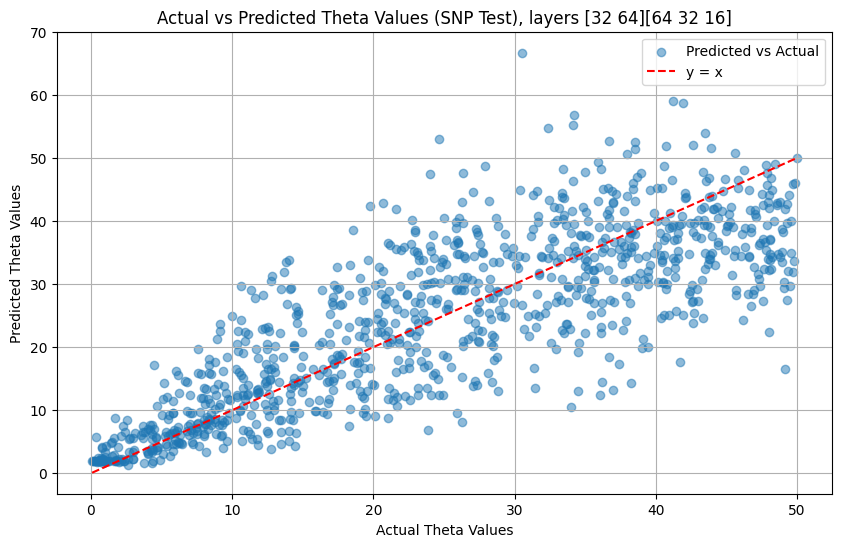

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(theta_test, theta_test_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(theta_test), max(theta_test)], [min(theta_test), max(theta_test)], color='red', linestyle='--', label='y = x')
plt.title('Actual vs Predicted Theta Values (SNP Test), layers [32 64][64 32 16]')
plt.xlabel('Actual Theta Values')
plt.ylabel('Predicted Theta Values')
plt.legend()
plt.grid(True)
plt.show()